In [55]:
import sympy
from sympy import S, symbols, solve, solveset, integrate, Integral, diff, plot, Piecewise, latex
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi

## Занятие 10
## Математический анализ
## Кусочные функции, замена переменной в интеграле
## Интеграл с переменным верхним пределом
### 1. 
Пусть задана вещественная функция одной переменной $f(t)$, непрерывная на отрезке $[a,b]$.

Пусть $F(x)$ определена на отрезке $[a,b]$ так:
$$
F(x)=\int_a^x f(t)\,dt.
$$
Такая функция $F(x)$ непрерывна на $[a,b]$, дифференцируема на $(a,b)$ и
$$
F'(x)=f(x)\mbox{ на } (a,b).
$$
### 2. 
Пусть на отрезке $[a,b]$ задана вещественная интегрируемая на $[a,b]$ функция одной переменной $f(t)$, а $F$ - первообразная функции $f$ на $[a,b]$, т.е.
$$
f(x)=F'(x),
$$
тогда
$$
\int_a^b f(t)\,dt=F(b)-F(a).
$$


### Пример 1
Пусть  $f(t)=\cos(t)$, на отрезке $[0,4\pi]$ тогда 
$$
F(x)=\int_0^x \cos(t)\,dt=\sin(x).
$$

Вычислим $F(x)$ с помощью integrate(f, t) и построим  графики $F(x)$ и $\sin(x)$. В легенде выведем значение $F(x)$, в нашем случае это $\sin(x)$. Чтобы не писать формулу вручную, воспользуемся функцией latex в режиме mode='inline'.

sin(x)

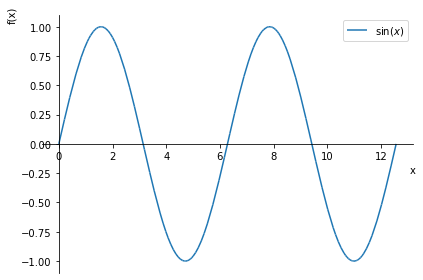

In [56]:
from sympy.abc import x, t
F = integrate(Cos(t), (t, 0, x))
display(F)
plot(F, (x, 0, 4*Pi), label=latex(F, mode='inline'), legend=True)

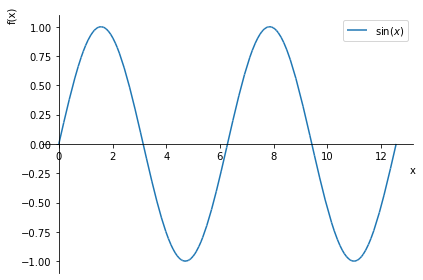

In [ ]:
plot(Sin(x), (x, 0, 4*Pi), label=latex(Sin(x), mode='inline'), legend=True)

Функция $F(x)$, определенная на отрезке $[a,b]$ по формуле
$$
F(x)=\int_a^x f(t)\,dt,
$$
выражает площадь между графиком функции $f$ и осью абсцисс на отрезке $[a,x]$ (если график $f$ ниже оси, то площадь считается отрицательной).

### Пример 2.
Вычислим площадь под графиком функции
$f(t)=\frac1t$ на отрезке $[0.1,x]$
$$
S(x)=\int_{0.1}^{x} \frac1t \,dt=\ln|t||_{0.1}^x=\ln x-\ln 0.1=\ln x+\ln 10.
$$
Построим график функции $S(x)$, выражающей зависимость площади под графиком функции $f(t)$ от $x$ при $x$ из $[1, 2]$. 

Вначале опишем $S(x)$ в виде функции $S_{func}(x)$, вызовем $S_{func}(x)$, чтобы убедиться в правильности вычислений.

Важно: не используйте имена встренных функций и переменных, переопределение втроенных объектов приведет к непредсказуемым резутьтатам.

In [58]:
def S_func(x):
    return integrate(1/t, (t, S(1)/10, x))
S_func(x)

log(x) + log(10)

Построим график $S_{func}(t)$ на  $[1, 2]$

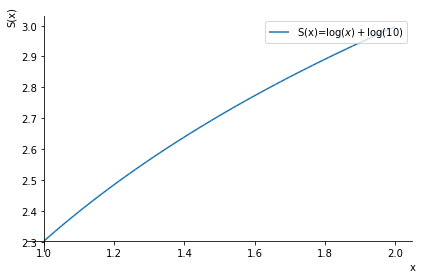

In [59]:
plot(S_func(x), (x, 1, 2), axis_center=(1, S_func(1)), ylabel='S(x)', legend=True, 
     label='S(x)=' + latex(S_func(x), mode='inline'))

### Интегрирование кусочно заданной функции
Пусть функция  $f(t)$ определена так:
$$
f(t)=|t|=\left\{\begin{matrix}
-t^2,\quad t<0\\
t^2,\quad t\ge0
\end{matrix}\right.
$$
Для работы с кусочно заданными функциями в sympy используется Piecewise
https://docs.sympy.org/latest/modules/functions/elementary.html?highlight=piecewise#sympy.functions.elementary.piecewise.Piecewise

Определение:

Piecewise((expr, cond), (expr, cond), … )

аргументы Piecewise - кортежи tuple, состоящие из выражения и условия, при котором функция должна быть равна этому выражению. 

Условия проверяются слева направо, пока не будет выполнено какое-то условие, тогда функция принимает вычисленное по соответствующему выражению значение. Условия не обязательно должны быть взаимоисключающими, но это желательно, чтобы не было путаницы.

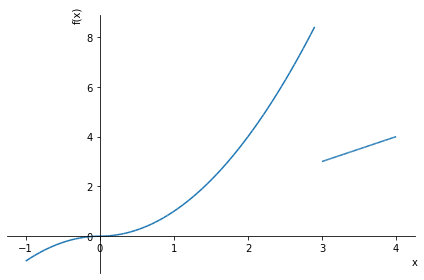

In [ ]:
f = Piecewise((-t**2, t < 0), (t**2, t<3), (t, True))
plot((f, (t, -1, 2.9)), (f, (t, 3, 4)))

Найдем интеграл этой функции (точнее, выражения) на отрезке $[0,1]$:

In [61]:
f.integrate((t, 0, 1))

-16/3 + 10*sqrt(5)/3

Напомним, что применять integrate можно и как метод, и как функцию.

In [ ]:
integrate(f, (t, 0, 5))

17

### Пример 3. 
Вычислим площадь фигуры, ограниченной сверху графиком функции 
$$
f(t)=\left\{\begin{matrix}
2-t^2,\quad t<0\\
\sqrt{t + 4},\quad t\ge0
\end{matrix}\right.
$$
а снизу $g(t)=|t|$.

Вначале зададим $f(t)$ как кусочную функцию и построим графики $f(t)$ и $g(t)$, lдля извлечения квадратного корня воспользуемся возведением в степень $1/2$, а для того, чтобы $1/2$ считалась простой дробью, используем  S.Half.

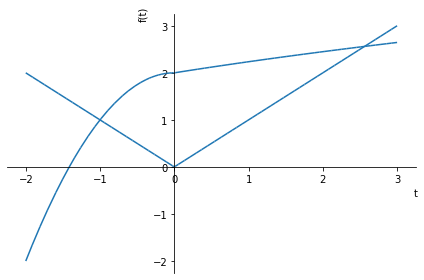

In [ ]:
f = Piecewise((2 - t**2, t < 0), ((t + 4)**S.Half, t >= 0))
g = abs(t)
plot(f, g, (t, -2, 3))

Найдем точки пересечения $f(t)$ и $p(t)$

In [62]:
roots = solveset(sympy.Eq(f, g), domain=S.Reals)
roots

FiniteSet(-1, 1/2 + sqrt(17)/2)

In [ ]:
# integral f(t) dt - integral g(t) dt <=> (f(t) - g(t)).integral(dt)

Площадь фигуры, ограниченной графиками функций, равна интегралу разности верхней и нижней функции в пределах от меньшего до большего из двух найденных корней.

In [63]:
S_fg = (f - g).integrate((t, min(roots), max(roots)))
S_fg

-25/6 - (1/2 + sqrt(17)/2)**2/2 + 2*(sqrt(17)/2 + 9/2)**(3/2)/3

Упростим, применим simplify как метод:

In [64]:
S_fg.simplify() 

-25/6 - (1 + sqrt(17))**2/8 + sqrt(2)*(sqrt(17) + 9)**(3/2)/6

### Замена переменной в интеграле
#### Замена переменной в неопределенном интеграле

В SymPy есть класс Integral, который можно использовать для проведения преобразований под знаким интеграла (без вычислений интеграла)

Пусть $I = \int |x|\,dx$ неопределенный интеграл функции $|x|$:

In [ ]:
I = Integral(abs(x), x)
I

Integral(Abs(x), x)

Заменим переменную интегрирования $x$ на $u$:

In [ ]:
from sympy.abc import u
I.transform(x, u)

Integral(Abs(u), u)

In [ ]:
y = abs(x)
integrate(y, x).transform(x, u)

Integral(Abs(u), u)

In [66]:
from sympy.abc import x

f = sympy.sin(x)
intr = Integral(f)
display(f.integrate()) #=>  -cos ВЕРНО
display(intr.integrate()) #=> -sin Ложно
display(intr.doit()) #=> -cos ВЕРНО

-cos(x)

-sin(x)

-cos(x)

Integral(sin(x), (x, 0, 2))

### Замена переменной в определенном интеграле
### Пример 4.
Введем определенный интеграл 
$$
I = \int_0^3 \sqrt{9 - x^2}\,dx
$$

In [67]:
x, y = symbols('x y', positive=True)
I = Integral((9 - x**2)**S.Half, (x, 0, 3))
I

Integral(sqrt(9 - x**2), (x, 0, 3))

Для вычисления интегралов такого типа используется подстановка $x = 3 \sin u$ или 

In [69]:
x, u = symbols('x u', positive=True)
I1 = I.transform(sympy.asin(x/3), u) # transform -> change bounds , subs -> NOT change
I1

Integral(3*sqrt(9 - 9*sin(u)**2)*cos(u), (u, 0, pi/2))

In [70]:
I1.doit()

9*Integral(sqrt(1 - sin(u)**2)*cos(u), (u, 0, pi/2))

Вычислить такой интеграл не получится, если I1.doit() попытатьс выполнить прямо сейчас.

Однако невооруженным взглядом видно, что подынтегральное выражение можно упростить, но сначала до него нужно добраться!
### Выделение подынтегрального выражения.
В классе Integral есть атрибут function - подынтегральное выражение.
Может быть полезно, если после проведения замены нужно преобразовать полученное выражение, прежде чем интегрировать дальше:

In [ ]:
I1.function

3*sqrt(9 - 9*sin(u)**2)*cos(u)

In [71]:
f_simple = sympy.simplify(I1.function)
f_simple

9*cos(u)*Abs(cos(u))

In [72]:
I1.limits

((u, 0, pi/2),)

После такого, хотя и неполного, упрощения, интеграл уже удается вычислить, интегрируя упрощенную подынтегральную функцию в тех же пределах I1.limits:

In [73]:
f_simple.integrate(I1.limits)

9*pi/4

Можно было вычислить исходный интеграл с помощью doit:

In [ ]:
I.doit()

9*pi/4

In [ ]:
# y = atan(x) <= 
# не равносильно для интеграла
# I.transform().doit() <> I.doit()

In [ ]:
integr = Integral(7*x**6*(sympy.tan(x**7)**2+1))
display(integr)
y = sympy.Symbol('y')

Integral(7*x**6*(tan(x**7)**2 + 1), x)

In [ ]:
new_intgr = integr.transform(x, y**(S(1)/7))
display(new_intgr)

Integral(tan(y)**2 + 1, y)

Однако при изучении математического анализа подобные интегралы вычисляют именно с помощью тригонометрической замены.